In [1]:
import json
import pandas as pd
with open('Scrapped_1_243.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df

,text,date,attribute
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...","Jan 3, 2025","[No offer, Positive experience, Difficult inte..."
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...","Jan 3, 2025","[No offer, Positive experience, Difficult inte..."
2,"[I interviewed at NVIDIA in 1/2/2025, In total...","Jan 2, 2025","[No offer, Negative experience, Easy interview]"
3,"[I interviewed at NVIDIA in 1/2/2025, In total...","Jan 2, 2025","[No offer, Negative experience, Easy interview]"
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...","Dec 31, 2024","[Accepted offer, Positive experience, Average ..."
...,...,...,...
4855,[I applied through college or university. The ...,"Dec 21, 2009","[Accepted offer, Positive experience, Easy int..."
4856,[I applied through a recruiter. The process to...,"Sep 24, 2009","[Accepted offer, Neutral experience, Average i..."
4857,[I applied through a recruiter. The process to...,"Sep 24, 2009","[Accepted offer, Neutral experience, Average i..."
4858,[I applied through an employee referral. The p...,"Mar 29, 2009","[Accepted offer, Positive experience, Difficul..."


In [2]:
# Split the 'attribute' column into 3 separate columns
df[['Offer', 'Experience', 'Level']] = pd.DataFrame(df['attribute'].tolist(), index=df.index)

# Drop the original 'attribute' column and 'date' column
df = df.drop(columns=['attribute'])
df=df.drop('date', axis=1)

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No offer,Positive experience,Difficult interview
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No offer,Positive experience,Difficult interview
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No offer,Negative experience,Easy interview
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No offer,Negative experience,Easy interview
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Accepted offer,Positive experience,Average interview
...,...,...,...,...
4855,[I applied through college or university. The ...,Accepted offer,Positive experience,Easy interview
4856,[I applied through a recruiter. The process to...,Accepted offer,Neutral experience,Average interview
4857,[I applied through a recruiter. The process to...,Accepted offer,Neutral experience,Average interview
4858,[I applied through an employee referral. The p...,Accepted offer,Positive experience,Difficult interview


In [ ]:
# Remove keywords 'offer', 'experience', and 'interview' from attribute columns
keywords_to_remove = ['offer', 'experience', 'interview']
for col in ['Offer', 'Experience', 'Level']:
    for keyword in keywords_to_remove:
        df[col] = df[col].str.replace(keyword, '', regex=False).str.strip()

df['Offer'] = df['Offer'].replace({'Accepted': 'Yes', 'Declined': 'Yes'})

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4855,[I applied through college or university. The ...,Yes,Positive,Easy
4856,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4857,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4858,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [7]:
df = df.reset_index(drop=True)

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4855,[I applied through college or university. The ...,Yes,Positive,Easy
4856,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4857,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4858,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [ ]:
df = df.dropna()
df

In [9]:
df = df[df['text'] != 'NA']
df = df[df['Offer'] != 'NA']
df = df[df['Experience'] != 'NA']
df = df[df['Level'] != 'NA']
df

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4855,[I applied through college or university. The ...,Yes,Positive,Easy
4856,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4857,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4858,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [10]:
df.to_json('NVidia_Interview_data.json')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
import json
import pandas as pd
with open('NVidia_Interview_data.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df = df.reset_index(drop=True)
df

,text,Offer,Experience,Level
0,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
1,"[I interviewed at NVIDIA (Santa Clara, CA) in ...",No,Positive,Difficult
2,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
3,"[I interviewed at NVIDIA in 1/2/2025, In total...",No,Negative,Easy
4,"[I interviewed at NVIDIA in 12/31/2024, 1. tal...",Yes,Positive,Average
...,...,...,...,...
4579,[I applied through college or university. The ...,Yes,Positive,Easy
4580,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4581,[I applied through a recruiter. The process to...,Yes,Neutral,Average
4582,[I applied through an employee referral. The p...,Yes,Positive,Difficult


In [14]:
%pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 33.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import nltk
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess a single text string
def preprocess_text(text):
    # Handle None values
    if text is None:
        return ""  # Return an empty string or any placeholder you prefer

    # Remove punctuation using translate
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove words with 1 or 2 characters (optional)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing to each string in the 'text' column
def preprocess_text_list(text_list):
    if text_list is None:
        return []  # Return an empty list if the input is None
    return [preprocess_text(text) for text in text_list]

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text_list)

# Transform 'Offer' column (if it exists)
df['Offer'] = df['Offer'].replace({'Yes': 1, 'No': 0})
df

,text,Offer,Experience,Level
0,"[interviewed nvidia santa clara 132025, length...",0,Positive,Difficult
1,"[interviewed nvidia santa clara 132025, length...",0,Positive,Difficult
2,"[interviewed nvidia 122025, total three interv...",0,Negative,Easy
3,"[interviewed nvidia 122025, total three interv...",0,Negative,Easy
4,"[interviewed nvidia 12312024, talk network alg...",1,Positive,Average
...,...,...,...,...
4579,[applied college university process took dayi ...,1,Positive,Easy
4580,[applied recruiter process took weeki intervie...,1,Neutral,Average
4581,[applied recruiter process took weeki intervie...,1,Neutral,Average
4582,[applied employee referral process took weeksi...,1,Positive,Difficult


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df[['text', 'Experience', 'Level']], df['Offer'], test_size=0.2)

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_text = vectorizer.fit_transform(X_train['text'].apply(lambda x: ' '.join(x)))
X_test_text = vectorizer.transform(X_test['text'].apply(lambda x: ' '.join(x)))

In [31]:
encoder = OneHotEncoder()
X_train_cat = encoder.fit_transform(X_train[['Experience', 'Level']])
X_test_cat = encoder.transform(X_test[['Experience', 'Level']])

X_train = pd.concat([pd.DataFrame(X_train_text.toarray()), pd.DataFrame(X_train_cat.toarray())], axis=1)
X_test = pd.concat([pd.DataFrame(X_test_text.toarray()), pd.DataFrame(X_test_cat.toarray())], axis=1)

### We used Logistic Regression, Random Forest Regressor, SVM, XGBoost, ABA Boost, KNN, Decision Tree etc along with GridSearchCV and RandomizedSearchCV for hyperparameter tuning.
### In the end, Logistic Regression gives us the best result with an Accuracy of 95% and an F1 Score of 0.92.

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8527808069792803
Precision: 0.857707509881423
Recall: 0.6867088607594937
F1 Score: 0.7627416520210897


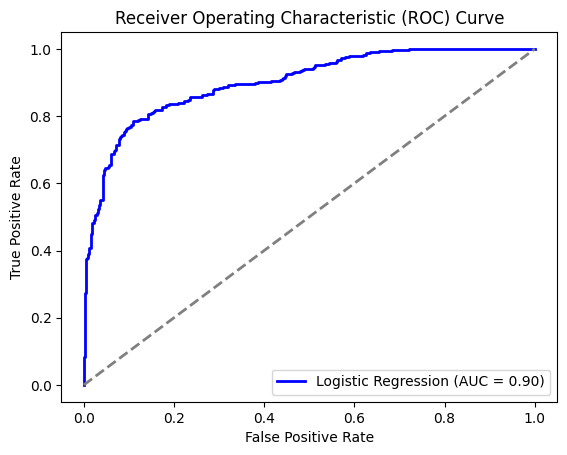

In [35]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9520174482006543
Precision: 0.9788732394366197
Recall: 0.879746835443038
F1 Score: 0.9266666666666666


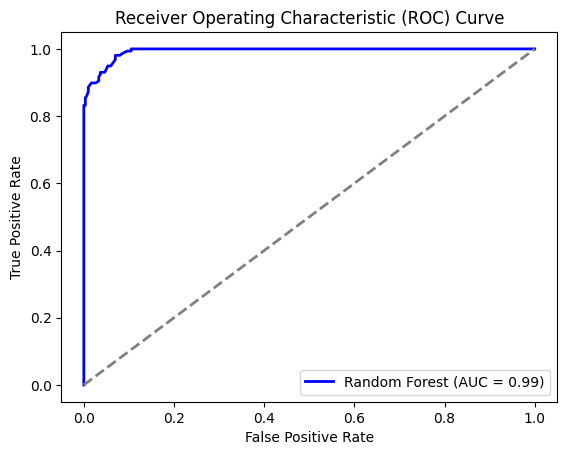

In [37]:
y_pred = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### ADA Boost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7393675027262814
Precision: 0.6757990867579908
Recall: 0.46835443037974683
F1 Score: 0.5532710280373832


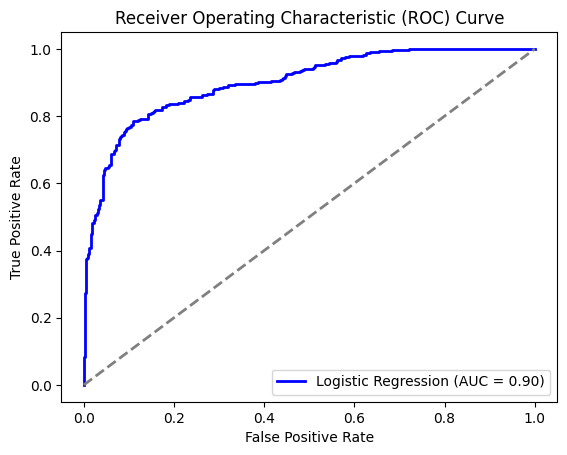

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7470010905125409
Precision: 0.6826086956521739
Recall: 0.49683544303797467
F1 Score: 0.575091575091575


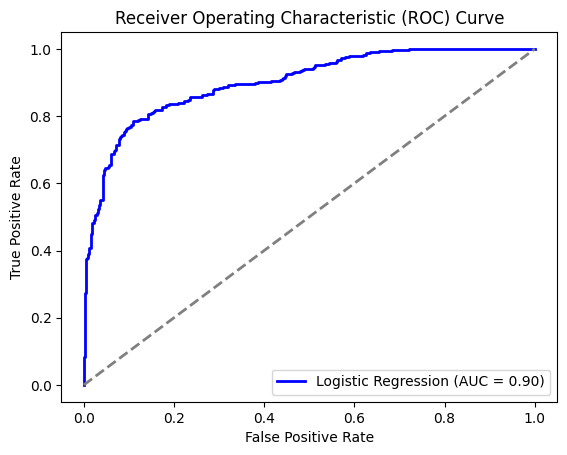

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()